**Исследование индекса потребительской лояльности (NPS) в секторе финансовых сервисов в Великобритании, США и Мексике в 2021 году**

Импортируем датафрейм Net Promoter Score (NPS) for financial services и загружаем необходимые библиотеки для анализа данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nps = pd.read_csv('NPStimeseries.csv')
nps

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS
0,1000,US,01/09/2021,Krista Richards,9,3,10
1,1001,MEX,07/11/2021,Monica King,11,4,9
2,1002,UK,25/12/2021,Ricky Armstrong,12,4,0
3,1003,UK,01/10/2021,Andrea Foley,10,4,10
4,1004,UK,01/03/2021,Jerry Garcia,3,1,8
...,...,...,...,...,...,...,...
4995,5995,MEX,02/07/2021,Deborah Peterson,7,3,7
4996,5996,MEX,17/03/2021,Jordan Smith,3,1,10
4997,5997,UK,07/01/2021,Carly Scott,1,1,8
4998,5998,UK,14/10/2021,Eugene Burke,10,4,8


**Определяем задачи исследования:**  
    - определить меры центральной тенденции по NPS в странах, принимавших участие в исследовании;  
    - исследовать динамику и тенденции изменения показателя в рассматриваемых странах;  
    - выявить общие закономерности изменения NPS;  
    - составить рекомендации для проведения дальнейших исследований с целью выявления факторов, влияющих на динамику данного показателя  

In [2]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5000 non-null   int64 
 1   Market         5000 non-null   object
 2   Survey date    5000 non-null   object
 3   Customer Name  5000 non-null   object
 4   Month          5000 non-null   int64 
 5   Quarter        5000 non-null   int64 
 6   NPS            5000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 273.6+ KB


В данном датафрейме всего 5000 строк, отсутствуют пропущенные значения. Числовые переменные имеют тип данных int64. В связи с этим работы по исключению пропущенных значений и перекодированием типовы данных в исследовании проводиться не будут. 

In [3]:
nps['NPS'].describe()

count    5000.00000
mean        6.84120
std         3.49228
min         0.00000
25%         5.00000
50%         8.00000
75%        10.00000
max        10.00000
Name: NPS, dtype: float64

**Методом describe по значениям переменной NPS выявлено:**  
    - средний показатель NPS по всем странам равен 6.84 из 10 возможных;  
    - среднеквадратичное отклонение по всем странам составляет 3.49;  
    - в датафрейме есть как минимальные оценки (0), так и максимальные (10) возможные в рамках формирования NPS.  
 В данном случае 0 нельзя считать аномальным значением выборки, поскольку является оценкой респондентов, то есть частью наших данных. В связи с этим работы по исключению выбросов в данном исследовании проводиться не будут. 

In [4]:
nps['Market'].value_counts()

UK     1720
MEX    1649
US     1631
Name: Market, dtype: int64

Всего в исследовании приняло участие 3 государства - Великобритания, США и Мексика.  
Данные содержат 1720 оценок финансовых услуг для Великобритации (наибольшее количество наблюдений),
1649 оценок для Мексики и 1631 оценку для США.

In [5]:
nps.groupby('Market')['NPS'].value_counts()

Market  NPS
MEX     10     504
        9      287
        8      255
        0      214
        7       94
        5       89
        6       52
        1       47
        3       37
        2       36
        4       34
UK      10     544
        8      263
        9      211
        5      149
        0      132
        6       99
        7       93
        3       69
        2       68
        4       51
        1       41
US      10     549
        0      219
        9      214
        8      162
        7      105
        1       84
        5       83
        3       75
        6       55
        2       50
        4       35
Name: NPS, dtype: int64

In [6]:
nps.groupby('Market')['NPS'].mean()

Market
MEX    6.939964
UK     6.988953
US     6.585530
Name: NPS, dtype: float64

In [7]:
nps.groupby('Market')['NPS'].median()

Market
MEX    8.0
UK     8.0
US     8.0
Name: NPS, dtype: float64

In [8]:
nps.groupby('Market')['NPS'].agg(['mean', 'median'])

,mean,median
Market,,
MEX,6.939964,8.0
UK,6.988953,8.0
US,6.585530,8.0


**Методами mean и median по значениям переменных Market и NPS выявлено:**  
    - среднее значение NPS финансовых услуг в Великобритании равно 6.99 (самый высокий показатель среди стран, принявших участие);  
    - среднее значение NPS финансовых услуг в Мексике равно 6.93;  
    - среднее значение NPS финансовых услуг в США равно 6.56 (самый низкий показатель);  
    - медианное значение NPS финаносвых услуг для всех стран одинаковое - 8.  
    
Также при группировке данных NPS по странам мы видим, что бОльшая часть оценок варьируется между 8, 9, и 10, 
однако в пятерке самых популярных оценок во всех странах также располагается 0, что значительно влияет на разницу между средним значением NPS по группе и медианным.

Сохраняем значения NPS по каждому рынку в отдельные переменные для дальнейшей работы:

In [9]:
nps_us = nps[nps['Market'] =='US']
nps_uk = nps[nps['Market'] =='UK']
nps_mex = nps[nps['Market'] =='MEX']

Группируем данные NPS помесячно и поквартально по среднему значению индекса:

In [10]:
nps_mean_month = nps.groupby(['Market', 'Month'])['NPS'].mean()
nps_mean_q = nps.groupby(['Market', 'Quarter'])['NPS'].mean()

Рассмотрим динамику NPS в исследуемых странах на линейных графиках по месяцам и по кварталам

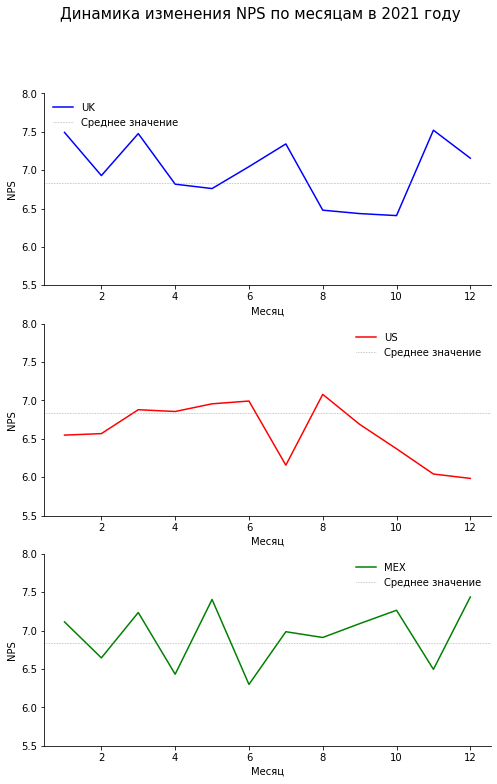

In [11]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
ax[0].plot(nps_mean_month.loc['UK'], c='blue')
ax[1].plot(nps_mean_month.loc['US'], c='red')
ax[2].plot(nps_mean_month.loc['MEX'], c='green')

for axis in ax.ravel():
    axis.set_ylim(5.5,8)
    axis.set_xlabel('Месяц')
    axis.set_ylabel('NPS')
    axis.axhline(6.84, c='grey', lw=0.6, ls=':')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    ax[0].legend(['UK', 'Среднее значение'], frameon=False)
    ax[1].legend(['US', 'Среднее значение'], frameon=False)
    ax[2].legend(['MEX', 'Среднее значение'], frameon=False)
    fig.suptitle('Динамика изменения NPS по месяцам в 2021 году', fontsize=15)

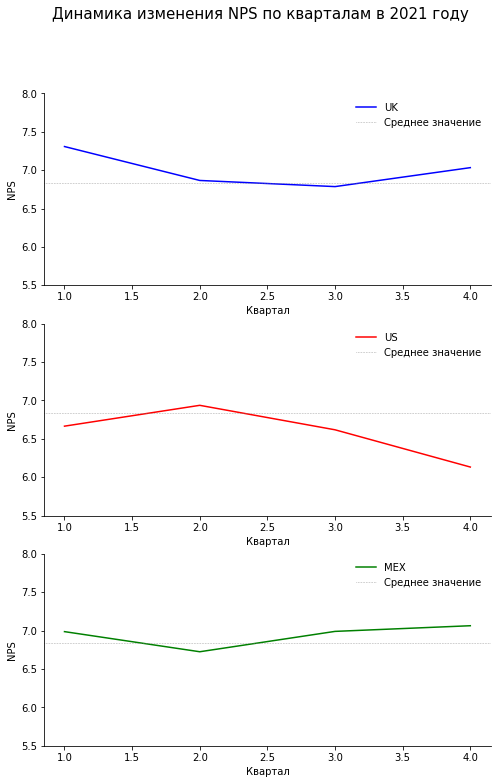

In [12]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
ax[0].plot(nps_mean_q.loc['UK'], c='blue')
ax[1].plot(nps_mean_q.loc['US'], c='red')
ax[2].plot(nps_mean_q.loc['MEX'], c='green')

for axis in ax.ravel():
    axis.set_ylim(5.5,8)
    axis.set_xlabel('Квартал')
    axis.set_ylabel('NPS')
    axis.axhline(6.84, c='grey', lw=0.6, ls=':')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    ax[0].legend(['UK', 'Среднее значение'], frameon=False)
    ax[1].legend(['US', 'Среднее значение'], frameon=False)
    ax[2].legend(['MEX', 'Среднее значение'], frameon=False)
    fig.suptitle('Динамика изменения NPS по кварталам в 2021 году', fontsize=15)

**При помощи визуализации данных о средних значениях NPS по странам в разрезе месяцев и кварталов было выявлено:** общая тенденция изменения NPS финансовых услуг по году в рассматриваемых странах отсутствует.
Есть некоторые сходства графиков NPS Великобритании и Мексики в первом и последнем квартале, однако помесячная динамика в странах разнится.

Исследуем корреляцию NPS с месяцами и кварталами

In [13]:
nps['Month'].corr(nps['NPS'])

-0.021878937878548697

In [14]:
nps['Quarter'].corr(nps['NPS'])

-0.02437967200276343

In [15]:
nps_uk['Month'].corr(nps['NPS'])

-0.031292179567016576

In [16]:
nps_us['Month'].corr(nps['NPS'])

-0.05093968615112912

In [17]:
nps_mex['Month'].corr(nps['NPS'])

0.016812408121210907

**Методом корреляции было выявлено:**
показатель NPS не коррелирует с месяцами и кварталами.   

In [18]:
month_nps = nps.groupby(nps['Month'])['NPS'].mean()
month_nps

Month
1     7.037209
2     6.713568
3     7.190594
4     6.698210
5     7.034014
6     6.768080
7     6.862579
8     6.813953
9     6.721429
10    6.664141
11    6.682692
12    6.875000
Name: NPS, dtype: float64

NPS является показателем, который оценивает, насколько потребители готовы рекомендовать продукт/бренд. Для этого респондентов просят ответить на вопрос "Какова вероятность того, что Вы порекомендуете компанию/товар/бренд своим друзьям/знакомым/коллегам?", на который собираются ответы по шкале от 0 до 10. На основе полученных оценок все потребители разделяются на 3 группы: 9-10 баллов — сторонники (promoters) товара/бренда, 7-8 баллов — нейтральные потребители (passives), 0-6 баллов — критики (detractors). Присвоим нашим данным категориальную переменную Promoter Category на основе стандартного распределения по шкале NPS.

In [19]:
def get_nps_cat(nps):
    if nps <= 6:
        return 'Detractor'
    elif nps == 7:
        return 'Passive'
    elif nps == 8:
        return 'Passive'
    elif nps >= 9:
        return 'Promoter'
    else: 
        return nps

nps['Promoter Category'] = nps['NPS'].apply(get_nps_cat)
nps.head()

,ID,Market,Survey date,Customer Name,Month,Quarter,NPS,Promoter Category
0,1000,US,01/09/2021,Krista Richards,9,3,10,Promoter
1,1001,MEX,07/11/2021,Monica King,11,4,9,Promoter
2,1002,UK,25/12/2021,Ricky Armstrong,12,4,0,Detractor
3,1003,UK,01/10/2021,Andrea Foley,10,4,10,Promoter
4,1004,UK,01/03/2021,Jerry Garcia,3,1,8,Passive


In [20]:
nps.groupby(['Promoter Category'])['NPS'].value_counts()

Promoter Category  NPS
Detractor          0       565
                   5       321
                   6       206
                   3       181
                   1       172
                   2       154
                   4       120
Passive            8       680
                   7       292
Promoter           10     1597
                   9       712
Name: NPS, dtype: int64

In [21]:
nps.groupby(['Promoter Category'])['NPS'].sum()

Promoter Category
Detractor     4344
Passive       7484
Promoter     22378
Name: NPS, dtype: int64

<AxesSubplot:xlabel='Market'>

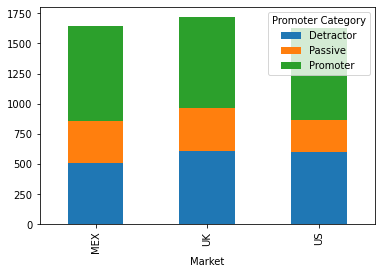

In [22]:
nps.groupby('Market')['Promoter Category'].value_counts().unstack().plot(kind='bar', stacked=True)

Таким образом мы видим, что большую часть клиентов финансовых услуг на рассматриваемых рынках составляют люди, готовые рекомендовать используемые услуги (Promoters).  
Тем не менее общие закономерности распределния показателя на рынках Великобритании, США и Мексики остаются невыявленными в силу недостатка переменных для анализа (например, возраст, пол, семейное положение, общий кредитный рейтинг, продолжительность использования финансовых услуг, наличие кредитов/ипотек и т.д.). В свяхи с этим главной рекомендацией для будущих исследований является проведение анкетирования выборки из базы клиентов для установления дополнительных параметров, влияющих на готовность  рекомендовать предоставителя финансовых услуг знакомым.

**Подведем итоги исследования обзором решенных задач:**  
  
- определить меры центральной тенденции по NPS в странах, принимавших участие в исследовании; **меры центральной тенденции по NPS определены**
- исследовать динамику и тенденции изменения показателя в рассматриваемых странах; **динамика изменения NPS рассмотрена с помощью различных визуализаций, тенденции исследованы**
- выявить общие закономерности изменения NPS; **данные исследованы, в настоящем датасете наблюдается нехватка переменных для выявления закономерностей**
- составить рекомендации для проведения дальнейших исследований с целью выявления факторов, влияющих на динамику данного показателя. **рекомендации составлены**

В связи с нехваткой данных для анализа текущего датасета далее будет проведено исследование на других данных, также посвященное банковскому сектору и потребительской лояльности, но под другим углом.

**Исследование оттока пользователей банков**

**Импортируем датафрейм Churn for Bank Customers**  
List of Contents:
- RowNumber - индекс строк  
- CustomerId - рандомные значения ID пользователей  
- Surname - фамилия пользователя  
- CreditScore - кредитный рейтинг пользователя  
- Geography - локация пользователя  
- Gender - пол пользователя  
- Age - возраст пользователя  
- Tenure - количество лет, которые пользователь является клиентом банка  
- Balance - баланс на счетах пользователя  
- NumOfProducts - количество продуктов, которые пользователь покупает у банка  
- HasCrCard - индикатор наличия кредитной карты у пользователя  
- IsActiveMember - индикатор активности пользователя банка  
- EstimatedSalary - прогнозная зарплата пользователя  
- Exited - индикатор отказал от банка пользователем  

In [23]:
churn = pd.read_csv('churn.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Удаляем лишний столбец с индексом

In [25]:
del churn['RowNumber']
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Задачи исследования:**   
- определить, какие параметры влияют на отказ пользователей от услуг банка;  
- сформировать рекомендации для удержания пользователей банка.

In [26]:
churn.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

<AxesSubplot:>

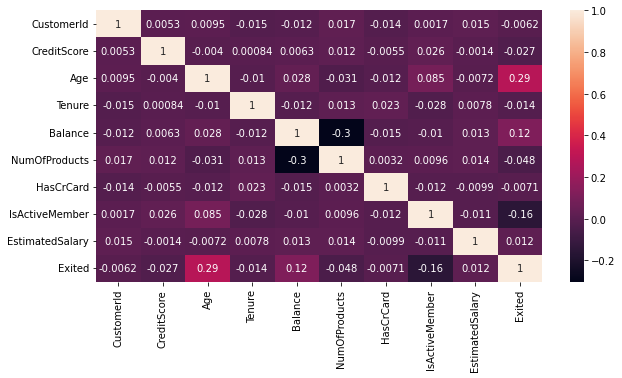

In [27]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(churn.corr(),annot=True)

Существует очень слабая обратная корреляция между колиечеством банковских продуктов и балансов на счету (чем меньше один показатель, тем выше другой) и слабая корреляция между возрастом и уходом от банка. На данном этапе прямых характеристик, влияющих на уход от банка не найдено. 

<AxesSubplot:xlabel='Exited'>

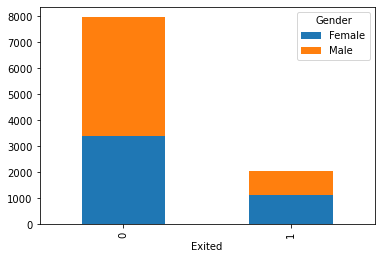

In [29]:
churn.groupby('Exited')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Exited'>

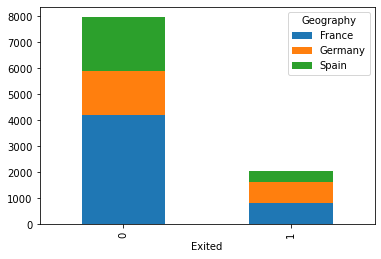

In [30]:
churn.groupby('Exited')['Geography'].value_counts().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Exited'>

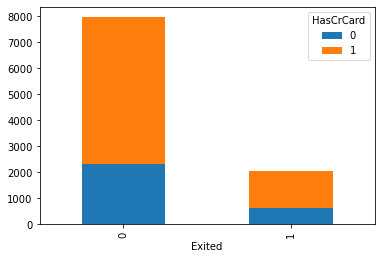

In [31]:
churn.groupby('Exited')['HasCrCard'].value_counts().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Exited'>

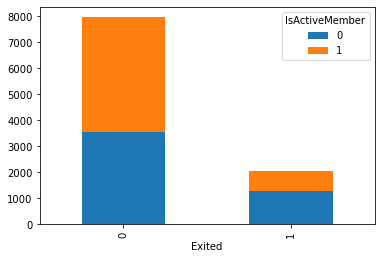

In [32]:
churn.groupby('Exited')['IsActiveMember'].value_counts().unstack().plot(kind='bar', stacked=True)

Характеристика большинства клиентов, покинувших банк:
- большая часть покинувших банк клиентов - женщины;
- меньше всего клиентов покинуло банк в Испании;
- большая часть клиентов имела кредитную карту;
- большая часть покинувших банк клиентов не были активными пользователями услуг банка.

In [33]:
mean_salary = churn.groupby(churn['Exited'])['EstimatedSalary'].mean()
mean_salary

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [34]:
median_salary = churn.groupby(churn['Exited'])['EstimatedSalary'].median()
median_salary

Exited
0     99645.04
1    102460.84
Name: EstimatedSalary, dtype: float64

Средняя и медианная ожидаемые зарплаты клиентов, покинувших банк, больше, чем у оставшихся клиентов.

<AxesSubplot:>

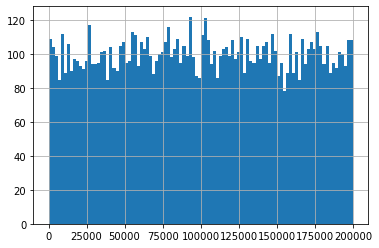

In [55]:
churn['EstimatedSalary'].hist(bins=100)

In [56]:
import scipy.stats 

In [57]:
churn['z-score'] = scipy.stats.zscore(churn['EstimatedSalary'])
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,z-score
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.021886
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.216534
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.240687
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,-0.108918
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,-0.365276


In [58]:
churn[churn['z-score'] < -3]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,z-score


In [59]:
churn.groupby('Exited')['z-score'].mean()

Exited
0   -0.006118
1    0.023917
Name: z-score, dtype: float64

Выбросы по ожидаемым зарплатам отсутствуют.

In [75]:
churn['GenderBinary'] = churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
H0: зависимость между наличием кредитной карты и уходом от банка отсутствует  
HA: зависимость между наличием кредитной карты и уходом от банка существует

In [64]:
alpha = 0.01
dof = (2 - 1)*(2 - 1)
print(dof)
critical_value = 6.63

1


In [119]:
ct_o = churn.groupby('HasCrCard')['Exited'].value_counts().unstack()
ct_o

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [120]:
n_total = ct_o.sum().sum()
print(n_total)

10000


In [121]:
n_exited_0 = ct_o[0].sum()
n_exited_1 = ct_o[1].sum()
print(n_exited_0, n_exited_1)

7963 2037


In [122]:
p_exited_0 = n_exited_0 / n_total
p_exited_1 = n_exited_1 / n_total
print(p_exited_0, p_exited_1)

0.7963 0.2037


In [123]:
n_card = ct_o.iloc[0].sum()
n_nocard = ct_o.iloc[1].sum()
print(n_card, n_nocard)

2945 7055


In [124]:
f_e_exited_0_card = n_card * p_exited_0
f_e_exited_1_card = n_card * p_exited_1
print(f_e_exited_0_card, f_e_exited_1_card)

2345.1035 599.8965


In [127]:
f_e_exited_0_nocard = n_nocard * p_exited_0
f_e_exited_1_nocard = n_nocard * p_exited_1
print(f_e_exited_0_nocard, f_e_exited_1_nocard)

5617.8965 1437.1035


In [128]:
ct_e = np.array([[f_e_exited_0_card, f_e_exited_1_card],
                 [f_e_exited_0_nocard, f_e_exited_1_nocard]])
print(ct_e)

[[2345.1035  599.8965]
 [5617.8965 1437.1035]]


In [129]:
ct_o[0].sum() * ct_o.iloc[0].sum() / n_total

2345.1035

In [130]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()
print(chi_square, critical_value)
print(chi_square > critical_value)

0.5094769780392745 6.63
False


In [131]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(0.5094769780392745,
 0.475365355970654,
 1,
 array([[2345.1035,  599.8965],
        [5617.8965, 1437.1035]]))

Нулевая гипотеза подтверждена, зависимость между переменными отсутствует. 

In [132]:
churn['BalanceBinary'] = churn['Balance'].apply(lambda x: 1 if x > 0 else 0)
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,z-score,GenderBinary,BalanceBinary
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.021886,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.216534,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.240687,0,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,-0.108918,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,-0.365276,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,-0.066419,1,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.027988,1,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,-1.008643,0,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,-0.125231,1,1


H02: зависимость между наличием денег на счету и уходом от банка отсутствует  
HA2: зависимость между наличием денег на счету и уходом от банка существует

In [133]:
ct_o_2 = churn.groupby('BalanceBinary')['Exited'].value_counts().unstack()
ct_o_2

Exited,0,1
BalanceBinary,,
0,3117,500
1,4846,1537


In [134]:
n_total_2 = ct_o_2.sum().sum()
print(n_total_2)

10000


In [135]:
n_exited_0_2 = ct_o_2[0].sum()
n_exited_1_2 = ct_o_2[1].sum()
print(n_exited_0_2, n_exited_1_2)

7963 2037


In [136]:
p_exited_0_2 = n_exited_0_2 / n_total_2
p_exited_1_2 = n_exited_1_2 / n_total_2
print(p_exited_0_2, p_exited_1_2)

0.7963 0.2037


In [137]:
n_balance = ct_o_2.iloc[0].sum()
n_nobalance = ct_o_2.iloc[1].sum()
print(n_balance, n_nobalance)

3617 6383


In [138]:
f_e_exited_0_balance = n_balance * p_exited_0_2
f_e_exited_1_balance = n_balance * p_exited_1_2
print(f_e_exited_0_balance, f_e_exited_1_balance)

2880.2171 736.7828999999999


In [139]:
f_e_exited_0_nobalance = n_nobalance * p_exited_0_2
f_e_exited_1_nobalance = n_nobalance * p_exited_1_2
print(f_e_exited_0_nobalance, f_e_exited_1_nobalance)

5082.7829 1300.2170999999998


In [140]:
ct_e_2 = np.array([[f_e_exited_0_balance, f_e_exited_1_balance],
                 [f_e_exited_0_nobalance, f_e_exited_1_nobalance]])
print(ct_e_2)

[[2880.2171  736.7829]
 [5082.7829 1300.2171]]


In [141]:
chi_square_2 = ((ct_o_2 - ct_e_2)**2 / ct_e_2).sum().sum()
print(chi_square_2, critical_value)
print(chi_square_2 > critical_value)

149.71302056498092 6.63
True


Нулевая гипотеза отвергнута, зависимость между переменными существует. 

In [210]:
import statsmodels.api as sm
X = churn['NumOfProducts']
y = churn['Balance']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=-32631.10836843744, intercept=126418.01131338297, rvalue=-0.30417973836054957, pvalue=4.297154279034854e-213, stderr=1022.0266892852176, intercept_stderr=1673.0673674325158)


In [211]:
r_sq = res.rvalue ** 2
print(r_sq)

0.0925253132290924


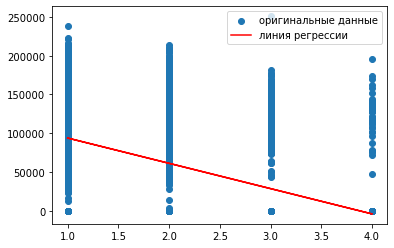

In [212]:
plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()

Коэффициент детерминации близок к 0 (мы можем объяснить с помощью нашего уравнения до 9% разброса данных), что означает низкую значимость модели, входная переменная плохо «объясняет» поведение выходной, т.е. линейная зависимость между ними отсутствует.

H02: существует сильная зависимость между кредитным рейтингом клиента и уходом от банка  
HA2: зависимость между кредитным рейтингом клиента и уходом от банка отсутствует

In [215]:
exited_cr_score = churn[churn['Exited'] == 1]['CreditScore']
not_exited_cr_score = churn[churn['Exited'] == 0]['CreditScore']
mean_1 = exited_cr_score.mean()
mean_2 = not_exited_cr_score.mean()
print(mean_1,mean_2)

645.3514972999509 651.8531960316463


In [216]:
t = scipy.stats.ttest_ind(exited_cr_score, not_exited_cr_score, equal_var=False)
t_critical = 12.7
t

Ttest_indResult(statistic=-2.634660543657579, pvalue=0.008464728991832877)

Значение T-критерия больше критического, значит нулевую гипотезу отвергаем - сильная связь между кредитным рейтингом и уходом клиента от банка отсутствует.

In [223]:
X = sm.add_constant(churn['Exited'])
y = churn['HasCrCard']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.606106
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              HasCrCard   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:               4.190e-05
Time:                        01:00:01   Log-Likelihood:                -6061.1
converged:                       True   LL-Null:                       -6061.3
Covariance Type:            nonrobust   LLR p-value:                    0.4761
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8816      0.025     35.799      0.000       0.833       0.930
Exited        -0.0387      0.

In [224]:
np.exp(0.8816)

2.4147602335456013

In [225]:
np.exp(-0.0387)

0.9620392776422207

Интерпретация результата логистической регрессии: если клиент имеет кредитную карту, то вероятность того, что он откажется от услуг банка значительно увеличивается по сравнению со сценарием, когда клиент не имеет кредитную карту.

In [229]:
X = sm.add_constant(churn['Exited'])
y = churn['IsActiveMember']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.680400
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         IsActiveMember   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.01774
Time:                        01:06:46   Log-Likelihood:                -6804.0
converged:                       True   LL-Null:                       -6926.9
Covariance Type:            nonrobust   LLR p-value:                 2.107e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2191      0.023      9.719      0.000       0.175       0.263
Exited        -0.7909      0.

In [230]:
np.exp(0.2191)

1.2449557660395638

In [231]:
np.exp(-0.7909)

0.453436518718614

Интерпретация результата логистической регрессии: если клиент является активным пользователем услуг банка, то вероятность того, что он откажется от услуг банка увеличивается в 1.24 раза по сравнению со сценарием, когда клиент не является активным пользователем.

Таким образом мы видим, что существует связь между наличием денег на счетах клиентов банков и их отказом от услуг банка. Вероятно такая связь может существовать по причине неудобства хранения денег на счетах банка, также такая связь может характеризовать лишь то, что от банка уходят только те клиенты, у которых не было денег на счету, или наоборот. В то же время было выявлено:   
1/ между наличием кредитной карты и отказом от услуг банка связь отсутствует;  
2/ линейная зависимость между количеством банковских продуктов и балансом на счету клиента отсутствует;  
3/ зависимость между кредитным рейтингом клиента и уходом от банка отсутствует;  
4/ если клиент имеет кредитную карту, то вероятность отказа от услуг банка значительно увеличивается;  
5/ если клиент является активным пользователем услуг банка, то вероятность отказа от услуг банка увеличивается в 1.24 раза.  
  
Рекомендуется провести оценку удобства хранения денег на счетах с точки зрения клиентов банка, провести UX-анализ приложения и сайта банка, исследовать удобства снятия денег в банкоматах, переводов между счетами и между банками, размеры комиссий на операции и срок обработки платежей, условия кредитования для владельцев кредитных карт и прочие признаки удобства использования услуг банка. 

**Подведем итоги исследования обзором решенных задач:**  
- определить, какие параметры влияют на отказ пользователей от услуг банка;  **параметр определен**  
- сформировать рекомендации для удержания пользователей банка. **рекомендации сформированы**